# check pseudobulk matrices

In [1]:
setwd('/charonfs/scratch/users/astar/gis/limchr/scATAC_celltypes/code')
library(Signac)
library(Seurat)
library(Matrix)
library(patchwork)
library(ggplot2)
library(rtracklayer)
library(GenomicRanges)
source("utilities.R")
library(tidyr)

Loading required package: SeuratObject

Loading required package: sp

Warning message:
“package ‘sp’ was built under R version 4.3.3”

Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:SeuratObject’:

    intersect


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.

### load cell type x ccre matrix

In [2]:
adrenal <- readRDS("../data/adrenal/adrenal_pseudobulk.rds")

In [3]:
dim(adrenal)
adrenal[1:2,1:10]

[1]       2 1520441

  [[ suppressing 10 column names ‘chr1-9919-10727’, ‘chr1-11043-11422’, ‘chr1-13249-13832’ ... ]]



2 x 10 sparse Matrix of class "dgCMatrix"
                                                           
1 19.54463 1.208946 . . .         . . .         . .        
3 13.19711 1.419044 . . 0.1419044 . . 0.1419044 . 0.1419044

In [21]:
esophagus <- readRDS("../data/esophagus/esophagus_pseudobulk.rds")

In [22]:
dim(esophagus)
esophagus[1:2, 1:10]

[1]       2 1520441

  [[ suppressing 10 column names ‘chr1-9919-10727’, ‘chr1-11043-11422’, ‘chr1-13249-13832’ ... ]]



2 x 10 sparse Matrix of class "dgCMatrix"
                                                                       
2 9.459619 0.472981 .         0.1182452 0.2364905 . 0.1182452 0.5912262
3 6.794721 1.960016 0.1306677 .         0.1306677 . .         0.1306677
                     
2 .         0.1182452
3 0.1306677 .        

In [14]:
heart_fetal <- readRDS("../data/heart_fetal/heart_fetal_pseudobulk.rds")

In [15]:
dim(heart_fetal)
heart_fetal[1:4,1:10]

[1]       4 1520441

  [[ suppressing 10 column names ‘chr1-9919-10727’, ‘chr1-11043-11422’, ‘chr1-13249-13832’ ... ]]



4 x 10 sparse Matrix of class "dgCMatrix"
                                                                             
1 12.734429 0.9261403 0.2315351 .         .         . . . 0.2315351 .        
3  7.354443 0.4085802 .         .         0.2042901 . . . 0.2042901 0.2042901
7  4.360092 1.9235701 .         .         .         . . . .         .        
9 21.160628 1.2824623 0.3206156 0.3206156 .         . . . .         .        

In [17]:
heartRV <- readRDS("../data/heartRV/heartRV_pseudobulk.rds")

In [18]:
dim(heartRV)
heartRV[1:4, 1:10]

[1]       4 1520441

  [[ suppressing 10 column names ‘chr1-9919-10727’, ‘chr1-11043-11422’, ‘chr1-13249-13832’ ... ]]



4 x 10 sparse Matrix of class "dgCMatrix"
                                                             
1 10.951812 0.5973716 0.5973716 . . . . .         .         .
2 15.197061 1.0020040 0.3340013 . . . . 0.3340013 0.1670007 .
5 29.077540 0.3342246 .         . . . . .         .         .
9  8.024586 0.1707359 .         . . . . .         .         .

In [5]:
liver <- readRDS("../data/liver/liver_pseudobulk.rds")

In [6]:
dim(liver)
liver[1:2,1:10]

[1]       2 1520441

  [[ suppressing 10 column names ‘chr1-9919-10727’, ‘chr1-11043-11422’, ‘chr1-13249-13832’ ... ]]



2 x 10 sparse Matrix of class "dgCMatrix"
                                    
3 6.996065 1.3117621 . . . . . . . .
7 8.828398 0.5517749 . . . . . . . .

In [7]:
left_colon <- readRDS("../data/left_colon/left_colon_pseudobulk.rds")

In [8]:
dim(left_colon)
left_colon[1:2,1:10]

[1]       2 1520441

  [[ suppressing 10 column names ‘chr1-9919-10727’, ‘chr1-11043-11422’, ‘chr1-13249-13832’ ... ]]



2 x 10 sparse Matrix of class "dgCMatrix"
                                                           
1 11.92818 1.106739 0.1229710 .         . . . . .         .
3 22.39414 .        0.4071661 0.4071661 . . . . 0.4071661 .

In [11]:
psoas_muscle <- readRDS("../data/psoas_muscle/psoas_muscle_pseudobulk.rds")

In [12]:
dim(psoas_muscle)
psoas_muscle[1:3,1:10]

[1]       3 1520441

  [[ suppressing 10 column names ‘chr1-9919-10727’, ‘chr1-11043-11422’, ‘chr1-13249-13832’ ... ]]



3 x 10 sparse Matrix of class "dgCMatrix"
                                                    
1 12.47478 0.5503577 0.1834526 . 0.1834526 . . . . .
2 11.66102 0.8135593 .         . 0.1355932 . . . . .
3 13.84298 0.6198347 0.2066116 . .         . . . . .

### add rownames

In [19]:
adrenal_rownames <- c("adrenal1", "adrenal2")
rownames(adrenal) <- adrenal_rownames

In [23]:
esophagus_rownames <- c("esophagus2", "esophagus3")
rownames(esophagus) <- esophagus_rownames

In [24]:
heartfetal_rownames <- c("heart_fetal1", "heart_fetal3", "heart_fetal7", "heart_fetal9")
rownames(heart_fetal) <- heartfetal_rownames

In [25]:
heartRV_rownames <- c("heartRV1", "heartRV2", "heartRV5", "heartRV9")
rownames(heartRV) <- heartRV_rownames

In [26]:
leftcolon_rownames <- c("left_colon1", "left_colon3")
rownames(left_colon) <- leftcolon_rownames

In [27]:
liver_rownames <- c("liver3", "liver7")
rownames(liver) <- liver_rownames

In [28]:
psoasmuscle_rownames <- c("psoas_muscle1", "psoas_muscle2", "psoas_muscle3")
rownames(psoas_muscle) <- psoasmuscle_rownames

### combine matrices

In [29]:
combined_pseudobulk <- rbind(adrenal, esophagus, heart_fetal, heartRV, 
                             left_colon, liver, psoas_muscle)

In [30]:
dim(combined_pseudobulk)

[1]      19 1520441

In [31]:
combined_pseudobulk[1:19,1:10]

  [[ suppressing 10 column names ‘chr1-9919-10727’, ‘chr1-11043-11422’, ‘chr1-13249-13832’ ... ]]



19 x 10 sparse Matrix of class "dgCMatrix"
                                                                           
adrenal1      19.544630 1.2089462 .         .         .         . .        
adrenal2      13.197105 1.4190436 .         .         0.1419044 . .        
esophagus2     9.459619 0.4729810 .         0.1182452 0.2364905 . 0.1182452
esophagus3     6.794721 1.9600157 0.1306677 .         0.1306677 . .        
heart_fetal1  12.734429 0.9261403 0.2315351 .         .         . .        
heart_fetal3   7.354443 0.4085802 .         .         0.2042901 . .        
heart_fetal7   4.360092 1.9235701 .         .         .         . .        
heart_fetal9  21.160628 1.2824623 0.3206156 0.3206156 .         . .        
heartRV1      10.951812 0.5973716 0.5973716 .         .         . .        
heartRV2      15.197061 1.0020040 0.3340013 .         .         . .        
heartRV5      29.077540 0.3342246 .         .         .         . .        
heartRV9       8.024586 0.1707359 .         .

In [32]:
saveRDS(combined_pseudobulk, "../data/pseudobulk/combined_pseudobulk.rds")

### split combined_pseudobulk per chromosome, change coordinates to ID

In [33]:
ccre <- read.table("../data/combined_cre.bed", sep="\t")

In [36]:
head(ccre)
dim(ccre)

,V1,V2,V3,V4,V5
,<chr>,<int>,<int>,<chr>,<chr>
1,chr1,9919,10727,PORHS000000001,TSS
2,chr1,11043,11422,PORHS000000002,TSS
3,chr1,13249,13832,PORHS000000003,"TSS,Enhancer"
4,chr1,14012,14345,PORHS000000004,Enhancer
5,chr1,15403,16233,PORHS000000005,"CTCF,TSS,Enhancer"
6,chr1,16415,16606,PORHS000000006,"CTCF,TSS"


[1] 1520441       5

In [34]:
ccre_id <- ccre$V4

In [35]:
ccre_chr <- unique(ccre$V1)

In [36]:
head(which(ccre$V1 == "chr1"), 1)
head(which(ccre$V1 == "chr2"), 1)
head(which(ccre$V1 == "chr3"), 1)
head(which(ccre$V1 == "chr4"), 1)

[1] 1

[1] 130487

[1] 261689

[1] 367179

In [37]:
colnames(combined_pseudobulk) <- ccre$V4

In [38]:
matrix_list <- list()
for (i in 1:length(ccre_chr)) {
    #print(ccre_chr[i])
    chr_start <- head(which(ccre$V1 == ccre_chr[i]), 1)
    chr_end <- tail(which(ccre$V1 == ccre_chr[i]), 1)

    matrix_split <- combined_pseudobulk[,chr_start:chr_end]
    matrix_list[[i]] <- matrix_split
}

In [39]:
getwd()

[1] "/charonfs/scratch/users/astar/gis/limchr/scATAC_celltypes/code"

In [40]:
dim(matrix_list[[1]])
matrix_list[[1]][1:19,1:5]
saveRDS(matrix_list[[1]], "../data/pseudobulk/chr1_pseudobulk.rds")

[1]     19 130486

19 x 5 sparse Matrix of class "dgCMatrix"
              PORHS000000001 PORHS000000002 PORHS000000003 PORHS000000004
adrenal1           19.544630      1.2089462      .              .        
adrenal2           13.197105      1.4190436      .              .        
esophagus2          9.459619      0.4729810      .              0.1182452
esophagus3          6.794721      1.9600157      0.1306677      .        
heart_fetal1       12.734429      0.9261403      0.2315351      .        
heart_fetal3        7.354443      0.4085802      .              .        
heart_fetal7        4.360092      1.9235701      .              .        
heart_fetal9       21.160628      1.2824623      0.3206156      0.3206156
heartRV1           10.951812      0.5973716      0.5973716      .        
heartRV2           15.197061      1.0020040      0.3340013      .        
heartRV5           29.077540      0.3342246      .              .        
heartRV9            8.024586      0.1707359      .              .     

In [41]:
which(ccre$V4 == head(colnames(matrix_list[[1]]), 1))
ccre[1,]

[1] 1

,V1,V2,V3,V4,V5
,<chr>,<int>,<int>,<chr>,<chr>
1,chr1,9919,10727,PORHS000000001,TSS


In [42]:
dim(matrix_list[[2]])
matrix_list[[2]][1:19,1:5]
saveRDS(matrix_list[[2]], "../data/pseudobulk/chr2_pseudobulk.rds")

[1]     19 131202

19 x 5 sparse Matrix of class "dgCMatrix"
              PORHS000586512 PORHS000586513 PORHS000586514 PORHS000586515
adrenal1           42.313117     127.543824      1.6119283      5.6417489
adrenal2           29.374202      30.509437      0.9933305      3.4057046
esophagus2          3.665602      11.824524      0.4729810      1.4189429
esophagus3          3.397361       6.272050      0.2613354      1.6986803
heart_fetal1       19.680482       9.261403      0.9261403      1.3892105
heart_fetal3        7.967314       8.580184      0.2042901      0.8171604
heart_fetal7        3.975378       6.540138      0.1282380      0.3847140
heart_fetal9       16.030779      40.397563      .              0.6412312
heartRV1           11.549184      16.726404      1.1947431      2.3894863
heartRV2           20.708083      46.092184      1.0020040      2.6720107
heartRV5           17.045455      29.745989      1.0026738      4.3449198
heartRV9           18.268738      34.317910      0.5122076      1.7073

In [43]:
which(ccre$V4 == head(colnames(matrix_list[[2]]), 1))
ccre[130486:130488,]

[1] 130487

,V1,V2,V3,V4,V5
,<chr>,<int>,<int>,<chr>,<chr>
130486,chr1,248945861,248946409,PORHS000117867,Promoter
130487,chr2,10116,10946,PORHS000586512,NA
130488,chr2,11184,12245,PORHS000586513,"CTCF,Promoter"


In [44]:
dim(matrix_list[[3]])
matrix_list[[3]][1:19,1:5]
saveRDS(matrix_list[[3]], "../data/pseudobulk/chr3_pseudobulk.rds")

[1]     19 105490

19 x 5 sparse Matrix of class "dgCMatrix"
              PORHS000777491 PORHS000777492 PORHS000777493 PORHS000777494
adrenal1           15.313319      23.372960      10.074552      6.6492041
adrenal2            9.223783       7.520931       5.108557      2.6961828
esophagus2          6.030507       2.837886       2.364905     31.4532340
esophagus3          6.272050       2.744022       2.221351     11.7600941
heart_fetal1        3.473026       3.473026       2.083816      2.7784209
heart_fetal3        2.451481       8.988764       4.698672      3.0643514
heart_fetal7        2.692998       3.462426       2.180046      1.2823801
heart_fetal9        8.336005       5.450465       2.244309      0.9618467
heartRV1            4.778973       7.964954       5.774592      4.1816010
heartRV2            6.847027      18.704075      12.191049      7.3480294
heartRV5            1.671123      19.050802      11.697861     14.0374332
heartRV9            3.414717      15.195493       9.049001      7.0001

In [45]:
which(ccre$V4 == head(colnames(matrix_list[[3]]), 1))
ccre[261688:261690,]

[1] 261689

,V1,V2,V3,V4,V5
,<chr>,<int>,<int>,<chr>,<chr>
261688,chr2,242182887,242183613,PORHS000706379,Promoter
261689,chr3,10165,11099,PORHS000777491,TSS
261690,chr3,11656,12515,PORHS000777492,TSS


In [46]:
dim(matrix_list[[4]])
matrix_list[[4]][1:19,1:5]
saveRDS(matrix_list[[4]], "../data/pseudobulk/chr4_pseudobulk.rds")

[1]    19 91297

19 x 5 sparse Matrix of class "dgCMatrix"
              PORHS000873483 PORHS000873484 PORHS000873485 PORHS000873486
adrenal1           31.029619      56.820471      6.2462220      0.8059641
adrenal2           13.197105      21.711367      3.8314176      1.1352349
esophagus2          4.729810      26.132198      1.0642072      1.6554334
esophagus3          1.829348       4.181367      2.4826865      0.7840063
heart_fetal1       17.596666      27.552674      3.0099560      0.2315351
heart_fetal3        4.290092      10.010215      1.2257406      .        
heart_fetal7        2.692998       5.514234      1.0259041      0.1282380
heart_fetal9        6.732927      12.824623      0.9618467      0.3206156
heartRV1           11.350060      39.426523      4.7789725      1.1947431
heartRV2            7.014028      20.374081      4.1750167      1.5030060
heartRV5           11.697861      34.425134      5.0133690      2.0053476
heartRV9           10.244152      21.171248      4.4391327      0.8536

In [47]:
which(ccre$V4 == head(colnames(matrix_list[[4]]), 1))
ccre[367178:367180,]

[1] 367179

,V1,V2,V3,V4,V5
,<chr>,<int>,<int>,<chr>,<chr>
367178,chr3,198233227,198233607,PORHS000873482,NA
367179,chr4,10019,10807,PORHS000873483,NA
367180,chr4,11019,12552,PORHS000873484,"CTCF,Promoter"


In [48]:
dim(matrix_list[[5]])
matrix_list[[5]][1:19,1:5]
saveRDS(matrix_list[[5]], "../data/pseudobulk/chr5_pseudobulk.rds")

[1]    19 92811

19 x 5 sparse Matrix of class "dgCMatrix"
              PORHS000957210 PORHS000957211 PORHS000957212 EH38D5622432
adrenal1           .              18.537175       7.858150    3.2238565
adrenal2           .              11.352349       5.959983    1.2771392
esophagus2         .               1.773679       2.483150    0.3547357
esophagus3         .               1.829348       1.045342    0.9146740
heart_fetal1       0.2315351      10.882149       9.261403    3.4730262
heart_fetal3       .               3.268641       4.290092    2.2471910
heart_fetal7       0.1282380       3.462426       1.025904    1.7953321
heart_fetal9       .               2.885540       9.297852    3.2061558
heartRV1           .               7.168459       7.765830    1.1947431
heartRV2           0.1670007       7.515030       9.853039    5.6780227
heartRV5           0.6684492      10.360963      13.703209    4.3449198
heartRV9           0.1707359       3.926925       4.951340    1.5366228
left_colon1        .  

In [49]:
which(ccre$V4 == head(colnames(matrix_list[[5]]), 1))
ccre[458475:458477,]

[1] 458476

,V1,V2,V3,V4,V5
,<chr>,<int>,<int>,<chr>,<chr>
458475,chr4,190204104,190204629,PORHS000957209,NA
458476,chr5,9919,10159,PORHS000957210,NA
458477,chr5,11810,12106,PORHS000957211,Promoter


In [50]:
dim(matrix_list[[6]])
matrix_list[[6]][1:19,1:5]
saveRDS(matrix_list[[6]], "../data/pseudobulk/chr6_pseudobulk.rds")

[1]    19 92433

19 x 5 sparse Matrix of class "dgCMatrix"
              PORHS001041974 PORHS001041975 PORHS001041976 PORHS001041977
adrenal1            4.432803              .              .      .        
adrenal2            2.270470              .              .      .        
esophagus2          4.729810              .              .      .        
esophagus3          1.568013              .              .      .        
heart_fetal1        2.778421              .              .      .        
heart_fetal3        1.838611              .              .      .        
heart_fetal7        1.795332              .              .      .        
heart_fetal9        1.923693              .              .      .        
heartRV1            5.177220              .              .      .        
heartRV2            4.509018              .              .      .        
heartRV5           23.729947              .              .      .        
heartRV9            6.487963              .              .      0.1707

In [51]:
which(ccre$V4 == head(colnames(matrix_list[[6]]), 1))
ccre[551286:551288,]

[1] 551287

,V1,V2,V3,V4,V5
,<chr>,<int>,<int>,<chr>,<chr>
551286,chr5,181477816,181478237,PORHS001041973,NA
551287,chr6,68685,69941,PORHS001041974,NA
551288,chr6,82081,82427,PORHS001041975,NA


In [52]:
dim(matrix_list[[7]])
matrix_list[[7]][1:19,1:5]
saveRDS(matrix_list[[7]], "../data/pseudobulk/chr7_pseudobulk.rds")

[1]    19 84353

19 x 5 sparse Matrix of class "dgCMatrix"
              PORHS001126331 PORHS001126332 PORHS001126333 PORHS001126334
adrenal1           0.4029821              .      .              .        
adrenal2           0.4257131              .      0.2838087      0.1419044
esophagus2         0.9459619              .      .              0.2364905
esophagus3         0.5226708              .      0.1306677      .        
heart_fetal1       0.4630702              .      .              .        
heart_fetal3       0.4085802              .      .              .        
heart_fetal7       0.1282380              .      .              .        
heart_fetal9       0.9618467              .      .              0.3206156
heartRV1           0.1991239              .      .              .        
heartRV2           0.5010020              .      .              .        
heartRV5           1.0026738              .      .              .        
heartRV9           0.1707359              .      .              .     

In [53]:
which(ccre$V4 == head(colnames(matrix_list[[7]]), 1))
ccre[643719:643721,]

[1] 643720

,V1,V2,V3,V4,V5
,<chr>,<int>,<int>,<chr>,<chr>
643719,chr6,170743191,170743594,PORHS001126330,NA
643720,chr7,10002,10240,PORHS001126331,NA
643721,chr7,11461,11612,PORHS001126332,NA


In [54]:
dim(matrix_list[[8]])
matrix_list[[8]][1:19,1:5]
saveRDS(matrix_list[[8]], "../data/pseudobulk/chr8_pseudobulk.rds")

[1]    19 76222

19 x 5 sparse Matrix of class "dgCMatrix"
              PORHS001203126 PORHS001203127 PORHS001203128 PORHS001203129
adrenal1           1.4104372      2.2164014      .              .        
adrenal2           1.1352349      .              0.1419044      .        
esophagus2         0.5912262      0.3547357      0.1182452      0.1182452
esophagus3         0.1306677      0.7840063      .              .        
heart_fetal1       1.6207455      0.4630702      0.2315351      .        
heart_fetal3       0.6128703      .              0.2042901      .        
heart_fetal7       0.3847140      0.2564760      0.1282380      .        
heart_fetal9       0.9618467      0.6412312      .              .        
heartRV1           1.1947431      0.9956193      0.1991239      .        
heartRV2           2.6720107      2.0040080      0.5010020      .        
heartRV5           3.3422460      2.6737968      0.3342246      0.3342246
heartRV9           1.7073587      1.3658870      0.5122076      0.1707

In [55]:
which(ccre$V4 == head(colnames(matrix_list[[8]]), 1))
ccre[728072:728074,]

[1] 728073

,V1,V2,V3,V4,V5
,<chr>,<int>,<int>,<chr>,<chr>
728072,chr7,159335579,159336037,PORHS001203125,Promoter
728073,chr8,65793,66559,PORHS001203126,TSS
728074,chr8,67664,67824,PORHS001203127,NA


In [56]:
dim(matrix_list[[9]])
matrix_list[[9]][1:19,1:5]
saveRDS(matrix_list[[9]], "../data/pseudobulk/chr9_pseudobulk.rds")

[1]    19 63336

19 x 5 sparse Matrix of class "dgCMatrix"
              PORHS001272013 PORHS001272014 PORHS001272015 PORHS001272016
adrenal1           22.365505      12.492444      12.693935       1.813419
adrenal2            6.669505       3.689513       5.676174       2.270470
esophagus2          2.483150       1.537188       2.719641       5.912262
esophagus3          3.266693       1.437345       2.090683       2.482687
heart_fetal1        9.492938       9.492938      10.419078       4.862237
heart_fetal3        3.472932       1.225741       3.064351       2.247191
heart_fetal7        1.410618       0.256476       0.384714       1.538856
heart_fetal9        8.015390       6.091696       6.091696       4.168003
heartRV1            6.969335       4.181601       5.973716       1.592991
heartRV2            9.352037       7.682031       8.851035       3.340013
heartRV5            5.347594       2.339572       2.673797       1.336898
heartRV9            5.122076       2.390302       4.609869       3.414

In [57]:
which(ccre$V4 == head(colnames(matrix_list[[9]]), 1))
ccre[804294:804296,]

[1] 804295

,V1,V2,V3,V4,V5
,<chr>,<int>,<int>,<chr>,<chr>
804294,chr8,145076898,145077320,PORHS001272012,NA
804295,chr9,9999,10663,PORHS001272013,TSS
804296,chr9,10665,10839,PORHS001272014,TSS


In [58]:
dim(matrix_list[[10]])
matrix_list[[10]][1:19,1:5]
saveRDS(matrix_list[[10]], "../data/pseudobulk/chr10_pseudobulk.rds")

[1]    19 74238

19 x 5 sparse Matrix of class "dgCMatrix"
              PORHS000117868 PORHS000117869 PORHS000117870 PORHS000117871
adrenal1           16.925247      27.805763      21.962523      0.4029821
adrenal2            7.946644      13.480914      15.041862      .        
esophagus2          1.300698       3.192621       7.212960      0.3547357
esophagus3          1.437345       2.090683       4.704038      0.2613354
heart_fetal1        8.798333      10.650614      11.808289      .        
heart_fetal3        2.655771       5.924413       5.720123      0.2042901
heart_fetal7        1.667094       3.590664       4.873044      .        
heart_fetal9       10.900930      16.351395       9.618467      0.3206156
heartRV1            6.770211      11.549184      20.111509      0.1991239
heartRV2            8.183033      12.525050      17.869071      0.3340013
heartRV5           10.026738      11.697861      45.788770      0.6684492
heartRV9            6.487963       6.829435      18.610210      0.3414

In [59]:
which(ccre$V4 == head(colnames(matrix_list[[10]]), 1))
ccre[867630:867632,]

[1] 867631

,V1,V2,V3,V4,V5
,<chr>,<int>,<int>,<chr>,<chr>
867630,chr9,138259344,138260001,PORHS001329401,NA
867631,chr10,10290,11015,PORHS000117868,Promoter
867632,chr10,11017,12009,PORHS000117869,Promoter


In [60]:
dim(matrix_list[[11]])
matrix_list[[11]][1:19,1:5]
saveRDS(matrix_list[[11]], "../data/pseudobulk/chr11_pseudobulk.rds")

[1]    19 71503

19 x 5 sparse Matrix of class "dgCMatrix"
              PORHS000185525 PORHS000185526 PORHS000185527 PORHS000185528
adrenal1                   .              .       .             .        
adrenal2                   .              .       .             .        
esophagus2                 .              .       .             0.2364905
esophagus3                 .              .       .             .        
heart_fetal1               .              .       .             .        
heart_fetal3               .              .       .             .        
heart_fetal7               .              .       .             .        
heart_fetal9               .              .       .             .        
heartRV1                   .              .       .             .        
heartRV2                   .              .       .             .        
heartRV5                   .              .       .             .        
heartRV9                   .              .       .             .     

In [61]:
which(ccre$V4 == head(colnames(matrix_list[[11]]), 1))
ccre[941868:941870,]

[1] 941869

,V1,V2,V3,V4,V5
,<chr>,<int>,<int>,<chr>,<chr>
941868,chr10,133786749,133787492,PORHS000185524,Promoter
941869,chr11,64086,64440,PORHS000185525,NA
941870,chr11,68116,68421,PORHS000185526,NA


In [62]:
dim(matrix_list[[12]])
matrix_list[[12]][1:19,1:5]
saveRDS(matrix_list[[12]], "../data/pseudobulk/chr12_pseudobulk.rds")

[1]    19 72556

19 x 5 sparse Matrix of class "dgCMatrix"
              PORHS000249669 PORHS000249670 PORHS000249671 EH38D4662344
adrenal1           10.074552       8.261132      1.8134193    0.4029821
adrenal2            8.230453       5.108557      1.7028523    .        
esophagus2          1.418943       2.246660      1.7736786    0.5912262
esophagus3          0.914674       2.090683      0.1306677    0.9146740
heart_fetal1        1.620746       3.241491      2.0838157    .        
heart_fetal3        5.311542       3.472932      2.4514811    0.2042901
heart_fetal7        1.410618       2.564760      1.9235701    0.1282380
heart_fetal9        2.885540       7.694774      4.8092337    0.3206156
heartRV1            1.792115       4.778973      1.7921147    0.3982477
heartRV2            1.503006       6.179025      0.6680027    0.3340013
heartRV5            4.344920       2.673797      2.3395722    0.6684492
heartRV9            3.073246       2.902510      2.0488305    0.1707359
left_colon1         2.

In [63]:
which(ccre$V4 == head(colnames(matrix_list[[12]]), 1))
ccre[1013371:1013373,]

[1] 1013372

,V1,V2,V3,V4,V5
,<chr>,<int>,<int>,<chr>,<chr>
1013371,chr11,135076299,135076659,PORHS000249668,"CTCF,TSS"
1013372,chr12,10485,10838,PORHS000249669,Promoter
1013373,chr12,10840,11644,PORHS000249670,"CTCF,Promoter"


In [64]:
dim(matrix_list[[13]])
matrix_list[[13]][1:19,1:5]
saveRDS(matrix_list[[13]], "../data/pseudobulk/chr13_pseudobulk.rds")

[1]    19 47443

19 x 5 sparse Matrix of class "dgCMatrix"
              EH38D2627175 EH38D2627180 EH38D4748656 PORHS000314853
adrenal1         0.2014910    0.2014910    .              6.8506951
adrenal2         0.1419044    0.4257131    .              4.8247481
esophagus2       0.3547357    0.3547357    0.3547357      3.1926215
esophagus3       .            0.2613354    .              1.6986803
heart_fetal1     .            .            .              1.8522806
heart_fetal3     .            .            .              0.8171604
heart_fetal7     .            0.1282380    .              1.6670941
heart_fetal9     .            .            .              1.6030779
heartRV1         0.1991239    0.7964954    .              6.7702111
heartRV2         0.1670007    0.1670007    .              4.8430194
heartRV5         2.0053476    6.0160428    0.3342246     24.3983957
heartRV9         0.1707359    2.2195663    0.3414717     12.2929828
left_colon1      0.1229710    0.2459420    0.1229710      4.1810133
left_c

In [65]:
which(ccre$V4 == head(colnames(matrix_list[[13]]), 1))
ccre[1085927:1085929,]

[1] 1085928

,V1,V2,V3,V4,V5
,<chr>,<int>,<int>,<chr>,<chr>
1085927,chr12,133265146,133265389,PORHS000314852,NA
1085928,chr13,16008157,16008507,EH38D2627175,DNase-H3K4me3
1085929,chr13,16017528,16017703,EH38D2627180,DNase-H3K4me3


In [66]:
dim(matrix_list[[14]])
matrix_list[[14]][1:19,1:5]
saveRDS(matrix_list[[14]], "../data/pseudobulk/chr14_pseudobulk.rds")

[1]    19 47440

19 x 5 sparse Matrix of class "dgCMatrix"
              PORHS000358122 PORHS000358123 PORHS000358124 PORHS000358125
adrenal1           .              0.2014910      .                      .
adrenal2           0.1419044      0.4257131      .                      .
esophagus2         0.2364905      0.2364905      0.1182452              .
esophagus3         .              0.2613354      0.1306677              .
heart_fetal1       .              0.2315351      .                      .
heart_fetal3       .              .              .                      .
heart_fetal7       .              .              0.1282380              .
heart_fetal9       .              .              .                      .
heartRV1           .              0.3982477      .                      .
heartRV2           .              0.5010020      0.5010020              .
heartRV5           .              1.0026738      4.0106952              .
heartRV9           .              0.5122076      0.8536794            

In [67]:
which(ccre$V4 == head(colnames(matrix_list[[14]]), 1))
ccre[1133370:1133372,]

[1] 1133371

,V1,V2,V3,V4,V5
,<chr>,<int>,<int>,<chr>,<chr>
1133370,chr13,114353656,114354408,PORHS000358121,Promoter
1133371,chr14,18282284,18282674,PORHS000358122,NA
1133372,chr14,18283678,18284008,PORHS000358123,NA


In [68]:
dim(matrix_list[[15]])
matrix_list[[15]][1:19,1:5]
saveRDS(matrix_list[[15]], "../data/pseudobulk/chr15_pseudobulk.rds")

[1]    19 46342

19 x 5 sparse Matrix of class "dgCMatrix"
              PORHS000400560 PORHS000400561 EH38D2766959 PORHS000400562
adrenal1           .              1.0074552    .                      .
adrenal2           0.2838087      0.7095218    0.1419044              .
esophagus2         0.1182452      0.3547357    .                      .
esophagus3         0.1306677      0.2613354    0.2613354              .
heart_fetal1       .              0.2315351    .                      .
heart_fetal3       .              .            0.2042901              .
heart_fetal7       .              .            .                      .
heart_fetal9       0.3206156      .            .                      .
heartRV1           0.1991239      0.5973716    0.1991239              .
heartRV2           0.6680027      0.5010020    0.5010020              .
heartRV5           7.0187166     12.3663102    4.6791444              .
heartRV9           5.9757555      8.5367936    2.2195663              .
left_colon1        0.1

In [69]:
which(ccre$V4 == head(colnames(matrix_list[[15]]), 1))
ccre[1180810:1180812,]

[1] 1180811

,V1,V2,V3,V4,V5
,<chr>,<int>,<int>,<chr>,<chr>
1180810,chr14,106882912,106883783,PORHS000400559,"CTCF,Promoter"
1180811,chr15,17000515,17000768,PORHS000400560,NA
1180812,chr15,17025568,17026126,PORHS000400561,Promoter


In [70]:
dim(matrix_list[[16]])
matrix_list[[16]][1:19,1:5]
saveRDS(matrix_list[[16]], "../data/pseudobulk/chr16_pseudobulk.rds")

[1]    19 44040

19 x 5 sparse Matrix of class "dgCMatrix"
              PORHS000442632 PORHS000442633 PORHS000442634 PORHS000442635
adrenal1           17.731211      .              .              3.4253476
adrenal2           22.562793      .              0.1419044      6.3856960
esophagus2         13.243467      .              0.1182452      0.9459619
esophagus3          9.800078      0.2613354      0.2613354      1.0453417
heart_fetal1       13.660570      .              .              1.8522806
heart_fetal3       12.870276      .              .              0.8171604
heart_fetal7       16.670941      .              .              0.2564760
heart_fetal9       27.252324      .              .              2.8855402
heartRV1           12.943051      .              .              2.7877340
heartRV2           17.535070      0.1670007      0.1670007      1.1690047
heartRV5           86.898396      .              0.3342246      5.3475936
heartRV9           25.439645      .              0.1707359      1.5366

In [71]:
which(ccre$V4 == head(colnames(matrix_list[[16]]), 1))
ccre[1227152:1227154,]

[1] 1227153

,V1,V2,V3,V4,V5
,<chr>,<int>,<int>,<chr>,<chr>
1227152,chr15,101979876,101981256,PORHS000442631,TSS
1227153,chr16,9937,11162,PORHS000442632,"CTCF,TSS"
1227154,chr16,13147,13833,PORHS000442633,TSS


In [72]:
dim(matrix_list[[17]])
matrix_list[[17]][1:19,1:5]
saveRDS(matrix_list[[17]], "../data/pseudobulk/chr17_pseudobulk.rds")

[1]    19 48282

19 x 5 sparse Matrix of class "dgCMatrix"
              EH38D4977589 PORHS000481758 PORHS000481759 PORHS000481760
adrenal1         .               91.27544      1.0074552       75.96212
adrenal2         1.1352349       27.67135      1.1352349       56.47793
esophagus2       0.1182452       36.77427      1.5371881       24.35852
esophagus3       .               12.15210      1.5680125       10.19208
heart_fetal1     .               31.72031      0.4630702       41.44478
heart_fetal3     0.8171604       18.38611      0.2042901       44.12666
heart_fetal7     .               15.64504      0.3847140       30.64888
heart_fetal9     .               50.65726      .               94.90221
heartRV1         .               25.48785      0.5973716       52.56870
heartRV2         1.8370073       52.10421      1.0020040       45.59118
heartRV5         .               53.81016      2.0053476       96.59091
heartRV9         0.3414717       29.02510      0.8536794       52.58665
left_colon1      0.737

In [73]:
which(ccre$V4 == head(colnames(matrix_list[[17]]), 1))
ccre[1271192:1271194,]

[1] 1271193

,V1,V2,V3,V4,V5
,<chr>,<int>,<int>,<chr>,<chr>
1271192,chr16,90227766,90228250,PORHS000481757,NA
1271193,chr17,118328,118644,EH38D4977589,"CTCF-only,CTCF-bound"
1271194,chr17,133864,135057,PORHS000481758,"CTCF,Enhancer"


In [74]:
dim(matrix_list[[18]])
matrix_list[[18]][1:19,1:5]
saveRDS(matrix_list[[18]], "../data/pseudobulk/chr18_pseudobulk.rds")

[1]    19 39766

19 x 5 sparse Matrix of class "dgCMatrix"
              PORHS000524119 PORHS000524120 PORHS000524121 PORHS000524122
adrenal1           28.410236      3.2238565      10.074552      13.096917
adrenal2           16.460905      2.1285653       5.959983      10.500922
esophagus2          4.493319      1.1824524       2.246660       2.364905
esophagus3          3.920031      0.2613354       0.914674       2.352019
heart_fetal1       14.355175      0.6946052       3.241491       6.019912
heart_fetal3        4.494382      1.0214505       2.247191       2.860061
heart_fetal7        3.975378      0.5129520       1.410618       1.410618
heart_fetal9       16.030779      2.8855402       8.336005       7.374158
heartRV1            9.358821      2.5886101       4.380725       6.571087
heartRV2           12.859051      2.1710087       5.511022      10.688043
heartRV5           20.387701      2.6737968       5.013369      11.697861
heartRV9            6.487963      0.3414717       2.219566       3.414

In [75]:
which(ccre$V4 == head(colnames(matrix_list[[18]]), 1))
ccre[1319474:1319476,]

[1] 1319475

,V1,V2,V3,V4,V5
,<chr>,<int>,<int>,<chr>,<chr>
1319474,chr17,83247101,83247462,PORHS000524118,NA
1319475,chr18,10041,11153,PORHS000524119,TSS
1319476,chr18,11155,11451,PORHS000524120,TSS


In [76]:
dim(matrix_list[[19]])
matrix_list[[19]][1:19,1:5]
saveRDS(matrix_list[[19]], "../data/pseudobulk/chr19_pseudobulk.rds")

[1]    19 31325

19 x 5 sparse Matrix of class "dgCMatrix"
              PORHS000560632 PORHS000560633 PORHS000560634 PORHS000560635
adrenal1                   .      .              .               .       
adrenal2                   .      .              .               .       
esophagus2                 .      .              .               .       
esophagus3                 .      0.1306677      0.1306677       .       
heart_fetal1               .      .              .               .       
heart_fetal3               .      0.2042901      0.4085802       .       
heart_fetal7               .      .              0.1282380       0.128238
heart_fetal9               .      .              .               .       
heartRV1                   .      .              .               .       
heartRV2                   .      .              .               .       
heartRV5                   .      0.3342246      0.3342246       .       
heartRV9                   .      .              .               .    

In [77]:
which(ccre$V4 == head(colnames(matrix_list[[19]]), 1))
ccre[1359240:1359242,]

[1] 1359241

,V1,V2,V3,V4,V5
,<chr>,<int>,<int>,<chr>,<chr>
1359240,chr18,80261753,80263320,PORHS000560631,Promoter
1359241,chr19,60078,60611,PORHS000560632,NA
1359242,chr19,60613,61211,PORHS000560633,NA


In [78]:
dim(matrix_list[[20]])
matrix_list[[20]][1:19,1:5]
saveRDS(matrix_list[[20]], "../data/pseudobulk/chr20_pseudobulk.rds")

[1]    19 37104

19 x 5 sparse Matrix of class "dgCMatrix"
              PORHS000706380 PORHS000706381 PORHS000706382 PORHS000706383
adrenal1           2.2164014      2.6193834       1.611928      1.8134193
adrenal2           1.9866610      1.9866610       2.696183      3.4057046
esophagus2         2.9561310      2.2466596       2.601395      3.5473572
esophagus3         1.3066771      1.5680125       1.829348      1.8293480
heart_fetal1       2.7784209      1.3892105       2.083816      3.2414911
heart_fetal3       2.2471910      1.6343207       2.247191      2.6557712
heart_fetal7       1.1541421      0.8976661       1.154142      0.8976661
heart_fetal9       3.2061558      2.5649247       1.923693      2.2443091
heartRV1           4.9780964      3.7833532       4.380725      5.5754679
heartRV2           4.5090180      6.5130261       5.511022      6.3460254
heartRV5          13.3689840      8.0213904      10.695187     14.3716578
heartRV9           6.3172272      3.9269250       5.122076      5.9757

In [79]:
which(ccre$V4 == head(colnames(matrix_list[[20]]), 1))
ccre[1390565:1390567,]

[1] 1390566

,V1,V2,V3,V4,V5
,<chr>,<int>,<int>,<chr>,<chr>
1390565,chr19,58607270,58607672,PORHS000586511,NA
1390566,chr20,59950,61119,PORHS000706380,Promoter
1390567,chr20,61121,61690,PORHS000706381,Promoter


In [80]:
dim(matrix_list[[21]])
matrix_list[[21]][1:19,1:5]
saveRDS(matrix_list[[21]], "../data/pseudobulk/chr21_pseudobulk.rds")

[1]    19 19402

19 x 5 sparse Matrix of class "dgCMatrix"
              PORHS000739652 PORHS000739653 PORHS000739654 PORHS000739655
adrenal1           2.4178924      2.2164014       4.231312       8.664114
adrenal2           4.1152263      1.8447566       5.818079       6.527600
esophagus2         3.3108667      2.3649048      10.405581      18.800993
esophagus3         0.3920031      0.3920031       3.266693       7.840063
heart_fetal1       3.4730262      1.3892105       3.704561       3.241491
heart_fetal3       2.8600613      1.2257406       2.247191       3.064351
heart_fetal7       3.0777122      1.9235701       2.051808       3.590664
heart_fetal9       2.2443091      1.6030779       4.488618       5.771080
heartRV1           4.3807248      3.1859817       6.969335       9.358821
heartRV2           5.5110220      4.1750167       7.515030      14.028056
heartRV5          12.3663102      5.6818182      10.026738      29.411765
heartRV9           5.9757555      2.2195663       5.122076      16.902

In [81]:
which(ccre$V4 == head(colnames(matrix_list[[21]]), 1))
ccre[1427669:1427671,]

[1] 1427670

,V1,V2,V3,V4,V5
,<chr>,<int>,<int>,<chr>,<chr>
1427669,chr20,64327117,64329522,PORHS000739651,"Promoter,Enhancer"
1427670,chr21,5011290,5012167,PORHS000739652,NA
1427671,chr21,5012169,5012490,PORHS000739653,NA


In [82]:
dim(matrix_list[[22]])
matrix_list[[22]][1:19,1:5]
saveRDS(matrix_list[[22]], "../data/pseudobulk/chr22_pseudobulk.rds")

[1]    19 23162

19 x 5 sparse Matrix of class "dgCMatrix"
              PORHS000757192 EH38D5378707 EH38D5378710 EH38D5378711
adrenal1           0.2014910    .            0.2014910    0.8059641
adrenal2           0.5676174    0.1419044    0.1419044    0.7095218
esophagus2         0.2364905    0.1182452    0.3547357    0.3547357
esophagus3         0.2613354    0.1306677    0.1306677    0.1306677
heart_fetal1       0.4630702    .            .            .        
heart_fetal3       0.4085802    0.2042901    .            0.4085802
heart_fetal7       .            .            0.2564760    0.1282380
heart_fetal9       0.3206156    .            .            .        
heartRV1           0.3982477    .            .            1.3938670
heartRV2           0.5010020    0.5010020    0.1670007    0.6680027
heartRV5           7.6871658    0.6684492    3.6764706    4.0106952
heartRV9           6.4879631    1.7073587    0.8536794    0.6829435
left_colon1        0.6148549    .            0.1229710    0.2459420
left_c

In [83]:
which(ccre$V4 == head(colnames(matrix_list[[22]]), 1))
ccre[1447071:1447073,]

[1] 1447072

,V1,V2,V3,V4,V5
,<chr>,<int>,<int>,<chr>,<chr>
1447071,chr21,46699722,46700041,PORHS000757191,Promoter
1447072,chr22,10600991,10601444,PORHS000757192,NA
1447073,chr22,10687285,10687630,EH38D5378707,"CTCF-only,CTCF-bound"


In [84]:
dim(matrix_list[[23]])
matrix_list[[23]][1:19,1:5]
saveRDS(matrix_list[[23]], "../data/pseudobulk/chrX_pseudobulk.rds")

[1]    19 47095

19 x 5 sparse Matrix of class "dgCMatrix"
              PORHS001329402 PORHS001329403 PORHS001329404 PORHS001329405
adrenal1           17.529720     10.2760427      3.2238565      5.2387669
adrenal2            5.108557      5.3923655      3.5476089      2.8380871
esophagus2          4.020338      3.1926215      1.0642072      1.5371881
esophagus3          1.568013      1.9600157      0.1306677      0.3920031
heart_fetal1        7.409122      4.1676314      1.8522806      3.0099560
heart_fetal3        3.268641      1.8386108      0.8171604      2.0429009
heart_fetal7        2.564760      2.6929982      0.6411900      1.0259041
heart_fetal9        6.091696      2.5649247      2.2443091      4.8092337
heartRV1            7.168459      7.5667065      3.5842294      3.3851055
heartRV2            4.843019      8.1830327      3.5070140      4.8430194
heartRV5           17.045455     14.0374332     10.3609626     11.0294118
heartRV9            4.097661      9.0490012      6.1464914      3.5854

In [85]:
which(ccre$V4 == head(colnames(matrix_list[[23]]), 1))
ccre[1470233:1470235,]

[1] 1470234

,V1,V2,V3,V4,V5
,<chr>,<int>,<int>,<chr>,<chr>
1470233,chr22,50808306,50808535,PORHS000777490,NA
1470234,chrX,9956,10836,PORHS001329402,NA
1470235,chrX,10838,11481,PORHS001329403,NA


In [86]:
dim(matrix_list[[24]])
matrix_list[[24]][1:19,1:5]
saveRDS(matrix_list[[24]], "../data/pseudobulk/chrY_pseudobulk.rds")

[1]   19 3113

19 x 5 sparse Matrix of class "dgCMatrix"
              PORHS001372584 PORHS001372585 PORHS001372586 PORHS001372587
adrenal1                   .              .              .              .
adrenal2                   .              .              .              .
esophagus2                 .              .              .              .
esophagus3                 .              .              .              .
heart_fetal1               .              .              .              .
heart_fetal3               .              .              .              .
heart_fetal7               .              .              .              .
heart_fetal9               .              .              .              .
heartRV1                   .              .              .              .
heartRV2                   .              .              .              .
heartRV5                   .              .              .              .
heartRV9                   .              .              .            

In [87]:
which(ccre$V4 == head(colnames(matrix_list[[24]]), 1))
ccre[1517328:1517330,]

[1] 1517329

,V1,V2,V3,V4,V5
,<chr>,<int>,<int>,<chr>,<chr>
1517328,chrX,156030455,156030824,PORHS001372583,Promoter
1517329,chrY,10004,11410,PORHS001372584,NA
1517330,chrY,13145,14961,PORHS001372585,NA


### check UMAPs, number of cells per tissue type

In [ ]:
adrenal = 12010
esophagus = 16110
heart_fetal = 20131
heartRV = 19859
left_colon = 10588
liver = 10011
psoas_muscle = 17666

An object of class Seurat 
200132 features across 12010 samples within 1 assay 
Active assay: ATAC (200132 features, 0 variable features)
 2 layers present: counts, data
 2 dimensional reductions calculated: integrated_lsi, umap

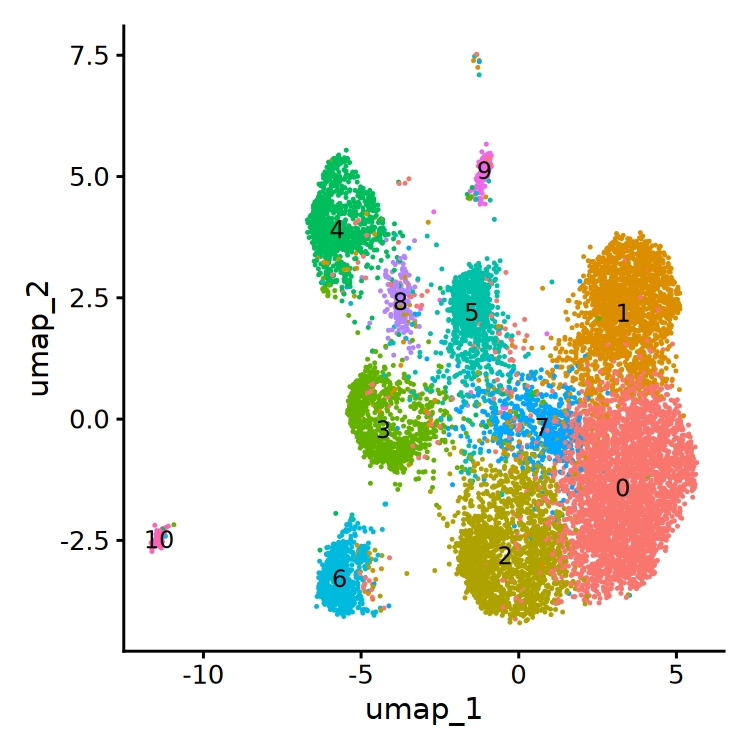

In [89]:
cell_type <- "adrenal"
obj <- readRDS(paste0("../data/",cell_type,"/",cell_type,"_integrated_filtered.rds"))
obj

options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 150)
DimPlot(object = obj, label = TRUE) + NoLegend()
#DimPlot(obj, group.by = 'dataset', label = TRUE) + NoLegend()

An object of class Seurat 
226707 features across 16110 samples within 1 assay 
Active assay: ATAC (226707 features, 0 variable features)
 2 layers present: counts, data
 2 dimensional reductions calculated: integrated_lsi, umap

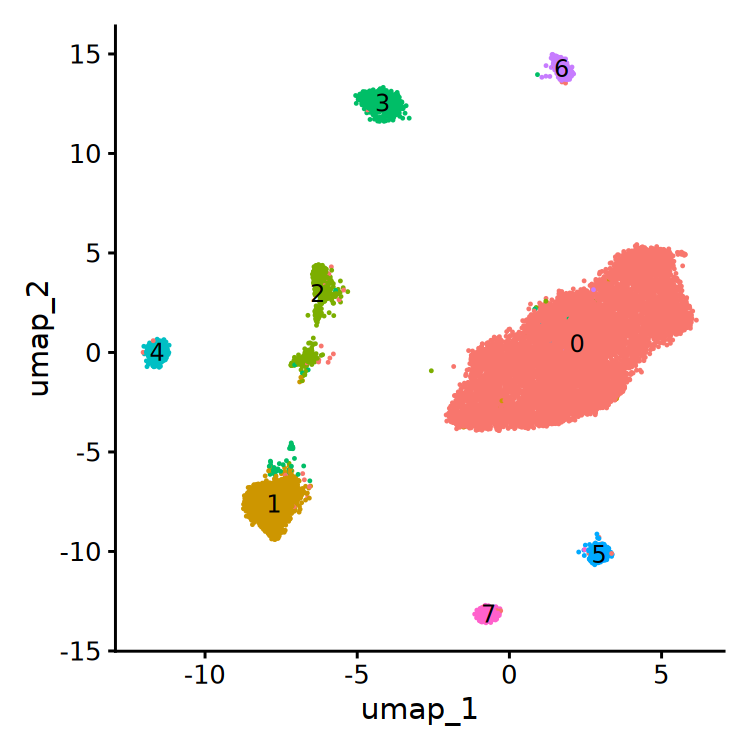

In [90]:
cell_type <- "esophagus"
obj <- readRDS(paste0("../data/",cell_type,"/",cell_type,"_integrated_filtered.rds"))
obj

options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 150)
DimPlot(object = obj, label = TRUE) + NoLegend()
#DimPlot(obj, group.by = 'dataset', label = TRUE) + NoLegend()

An object of class Seurat 
188067 features across 20131 samples within 1 assay 
Active assay: ATAC (188067 features, 0 variable features)
 2 layers present: counts, data
 2 dimensional reductions calculated: integrated_lsi, umap

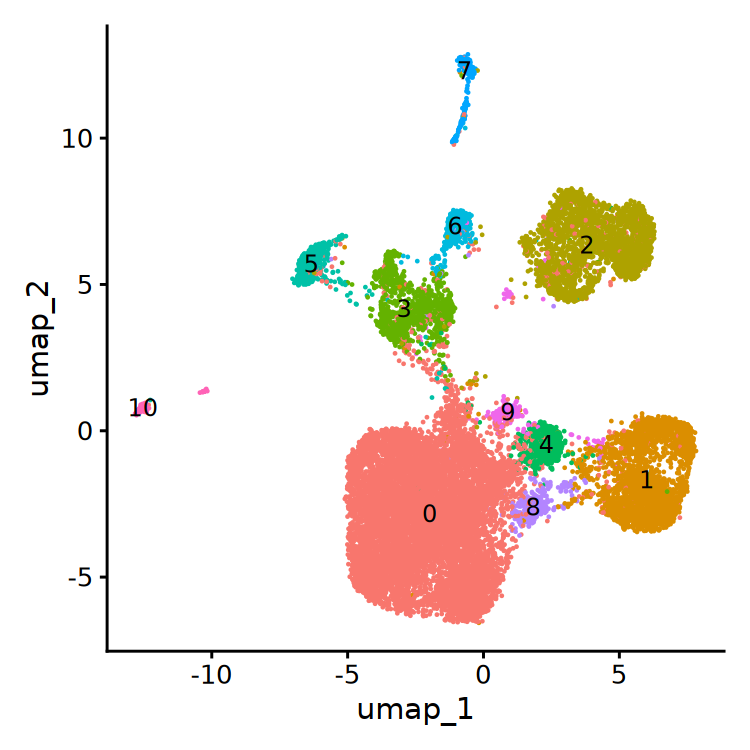

In [91]:
cell_type <- "heart_fetal"
obj <- readRDS(paste0("../data/",cell_type,"/",cell_type,"_integrated_filtered.rds"))
obj

options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 150)
DimPlot(object = obj, label = TRUE) + NoLegend()
#DimPlot(obj, group.by = 'dataset', label = TRUE) + NoLegend()

An object of class Seurat 
322017 features across 19859 samples within 1 assay 
Active assay: ATAC (322017 features, 0 variable features)
 2 layers present: counts, data
 2 dimensional reductions calculated: integrated_lsi, umap

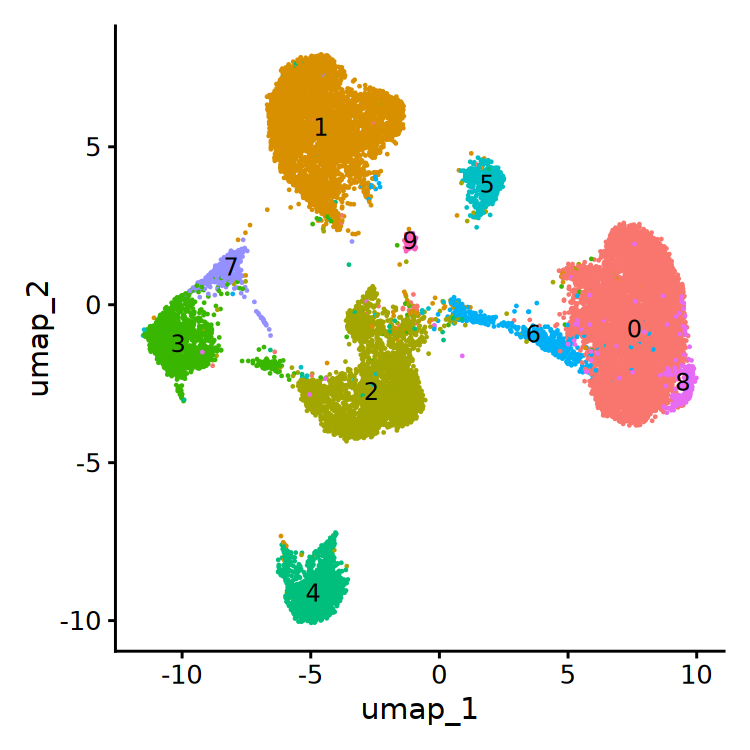

In [92]:
cell_type <- "heartRV"
obj <- readRDS(paste0("../data/",cell_type,"/",cell_type,"_integrated_filtered.rds"))
obj

options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 150)
DimPlot(object = obj, label = TRUE) + NoLegend()
#DimPlot(obj, group.by = 'dataset', label = TRUE) + NoLegend()

An object of class Seurat 
188210 features across 10588 samples within 1 assay 
Active assay: ATAC (188210 features, 0 variable features)
 2 layers present: counts, data
 2 dimensional reductions calculated: integrated_lsi, umap

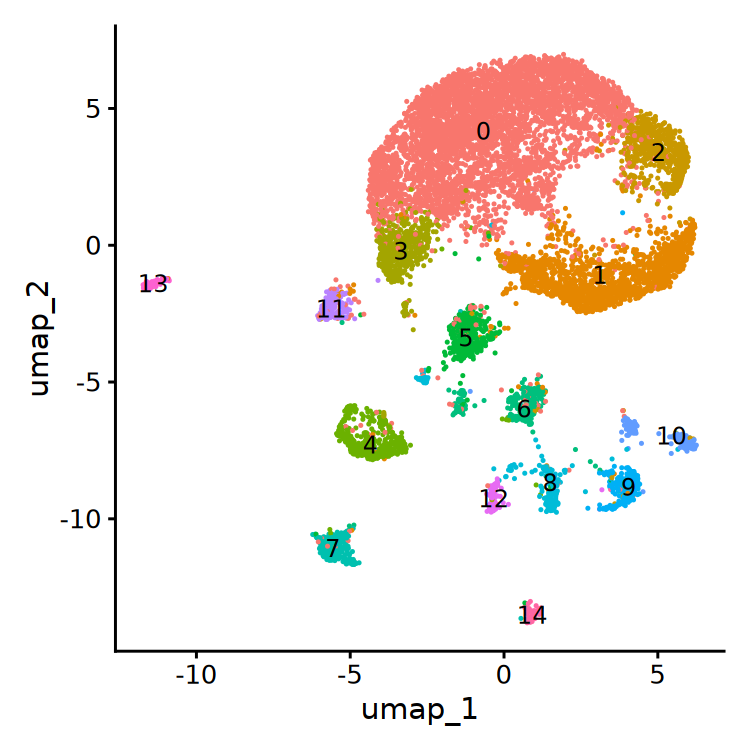

In [94]:
cell_type <- "left_colon"
obj <- readRDS(paste0("../data/",cell_type,"/",cell_type,"_integrated_filtered.rds"))
obj

options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 150)
DimPlot(object = obj, label = TRUE) + NoLegend()
#DimPlot(obj, group.by = 'dataset', label = TRUE) + NoLegend()

An object of class Seurat 
179429 features across 10011 samples within 1 assay 
Active assay: ATAC (179429 features, 0 variable features)
 2 layers present: counts, data
 2 dimensional reductions calculated: integrated_lsi, umap

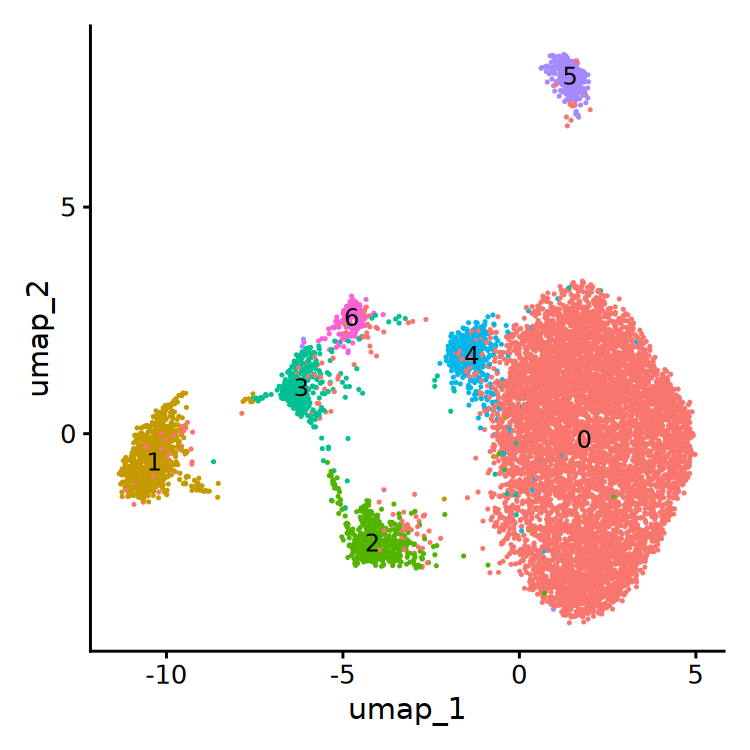

In [95]:
cell_type <- "liver"
obj <- readRDS(paste0("../data/",cell_type,"/",cell_type,"_integrated_filtered.rds"))
obj

options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 150)
DimPlot(object = obj, label = TRUE) + NoLegend()
#DimPlot(obj, group.by = 'dataset', label = TRUE) + NoLegend()

An object of class Seurat 
150366 features across 17666 samples within 1 assay 
Active assay: ATAC (150366 features, 0 variable features)
 2 layers present: counts, data
 2 dimensional reductions calculated: integrated_lsi, umap

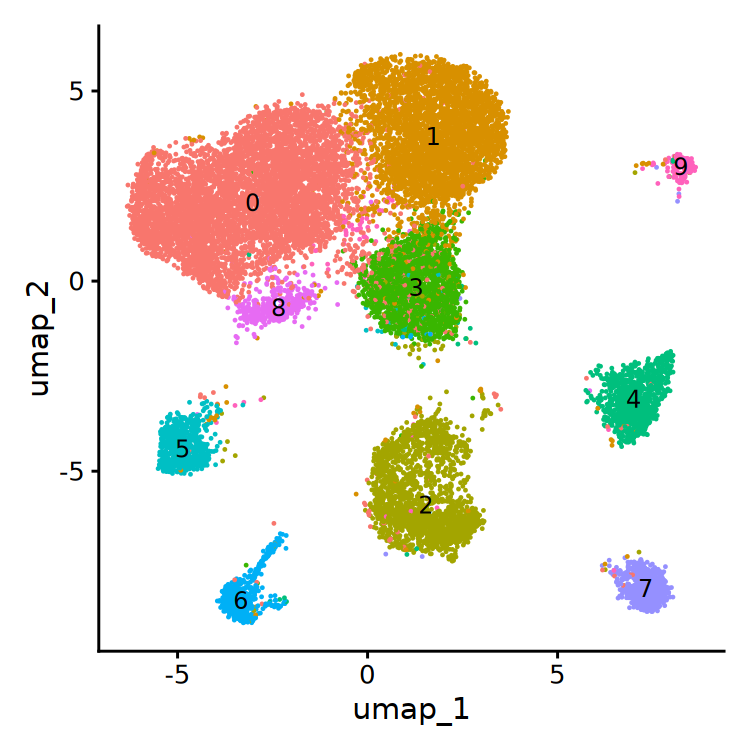

In [96]:
cell_type <- "psoas_muscle"
obj <- readRDS(paste0("../data/",cell_type,"/",cell_type,"_integrated_filtered.rds"))
obj

options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 150)
DimPlot(object = obj, label = TRUE) + NoLegend()
#DimPlot(obj, group.by = 'dataset', label = TRUE) + NoLegend()